In [1]:
import sys
import os
sys.path.append("../..")
from diachr import DiachromaticInteractionSet
from diachr import IaFreqDistAnalysis

# Create directory for output files generated in this notebook 
NOTEBOOK_RESULTS_DIR = 'results/distance_dependent_contact_frequencies'
%mkdir -p $NOTEBOOK_RESULTS_DIR

# Distance-dependent contact frequencies

In this notebook, we compare balanced and unbalanced interactions in terms of their total read pair counts per interaction and their distances. In order to keep the layout clear, we have outsourced functions for structuring the data, collecting the read pair counts and distances and plotting to a separate module.

In [2]:
ia_freq_dist_analysis = IaFreqDistAnalysis()

## Loading interaction data

### Choose an interaction file

In [3]:
AUTHOR = 'MIF' # JAV, SCH, MIF
PROTOCOL = 'CHC' # HC or CHC
CELL_TYPE_SHORT = 'GM12878' # MK, ERY, NEU, MON, MAC_M0, ..., , MESC, MFLC, GM12878
OUT_PREFIX = AUTHOR + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
INTERACTION_FILE = '../../UICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz' 

### Read interactions into data structure

In [4]:
# Create DiachromaticInteractionSet
d11_interaction_set = DiachromaticInteractionSet()
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    verbose = True)
# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
report_dict = ia_freq_dist_analysis.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../../UICer_interactions/CHC/MIF_GM12878_CHC_REPC_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Set size: 1,892,588
[INFO] ... done.
[INFO] Reading interactions and group them according to chromosomes, interaction and enrichment category ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Total number of interactions read: 1,892,588
[INFO] ... done.


### Organization of  interaction data

First, we create a `IaFreqDistAnalysis` object from an `DiachromaticInteractionSet` object, in which the interactions are grouped by interaction category and enrichment status (`E` stands for enriched and `N` for non-enriched).

In [5]:
print(ia_freq_dist_analysis.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 1,892,588
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 1,274
			[INFO] EE: 2,830
			[INFO] NE: 3,886
			[INFO] EN: 3,950
		[INFO] DI: 
			[INFO] NN: 1,632
			[INFO] EE: 35,903
			[INFO] NE: 306,868
			[INFO] EN: 309,979
		[INFO] UIR: 
			[INFO] NN: 1,632
			[INFO] EE: 35,903
			[INFO] NE: 308,838
			[INFO] EN: 308,009
		[INFO] UI: 
			[INFO] NN: 76
			[INFO] EE: 46,249
			[INFO] NE: 262,036
			[INFO] EN: 263,523
		[INFO] ALL: 
			[INFO] NN: 4,614
			[INFO] EE: 120,885
			[INFO] NE: 881,628
			[INFO] EN: 885,461
[INFO] End of report.



Note that the `UICer.py` script has already selected two reference sets from the balanced and unbalanced interactions, which are comparable in terms of their size and the distributions of total read pair counts per interaction. Interactions of category `DI` are unbalanced interactions for which balanced reference interactions could be selected. Interactions of category `UIR` are balanced reference interactions. Interactions of category `DIX` are unbalanced interactions for which no balanced interaction could be selected because there was no interaction with an identical total read pair count. Interactions of category `UI` are balanced interactions that have not been selected as a reference interaction.

## Collection of total read pair counts and interaction distances

In class `IaFreqDistAnalysis` we implemented a function that returns two dictionaries containing the total read pair counts and interaction distances structured as shown above.

In [6]:
rp_num_dict, i_dist_dict = ia_freq_dist_analysis.get_all_rp_nums_and_i_dists()

## 2x2 plot grids with histograms comparable in terms of axis limits and bin size

In addition, we implemented a plot function that can be used to compare the distributions of total read pair counts per interaction or interaction distances for two interaction categories and two enrichment states.

### Total read pair counts per interaction

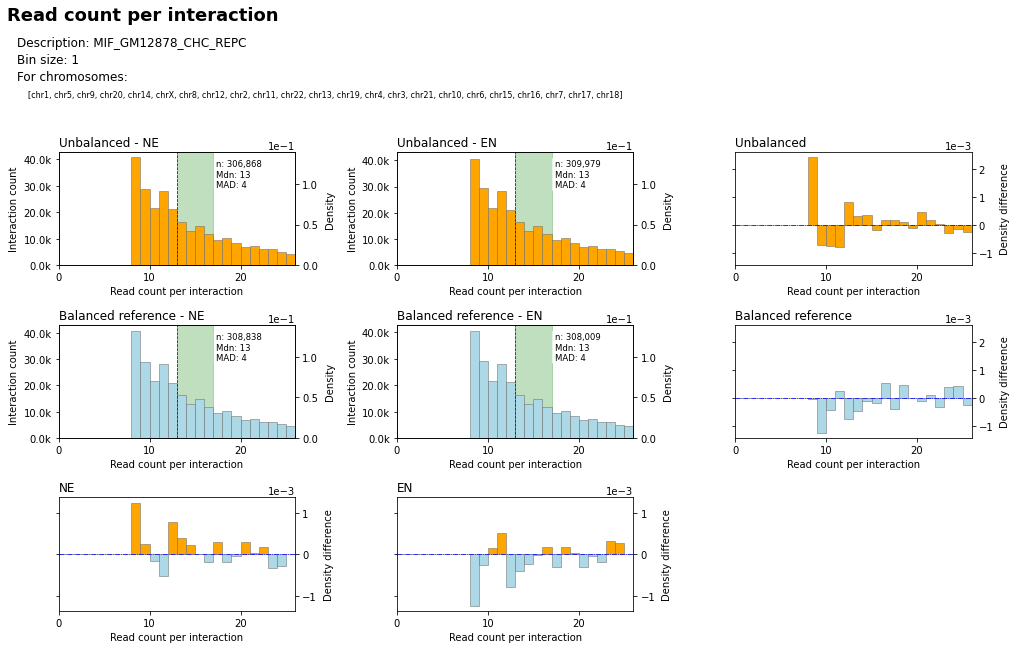

In [7]:
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis.create_2x2_hist_grid(
    num_dict = rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_rpc_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Explanation of the plot

In the plot grid, the x-axes of all histograms are comparable, with each histogram showing at least `q_lim` of the data. Each histogram has two y-axes, one for the absolute (left) and one for the relative frequencies (right). All histograms are normalized to the same maximum relative frequency. Each histogram contains three text fields, one for the number of interactions (n), one for the median (Mdn.) and one for the median absolute deviation (MAD). A blue dashed line is drawn at the median and the width of the  range highlighted in green corresponds to the MAD. The bar plots in the bottom row and the last column show the differences in densities for each bin.

### Interaction distances

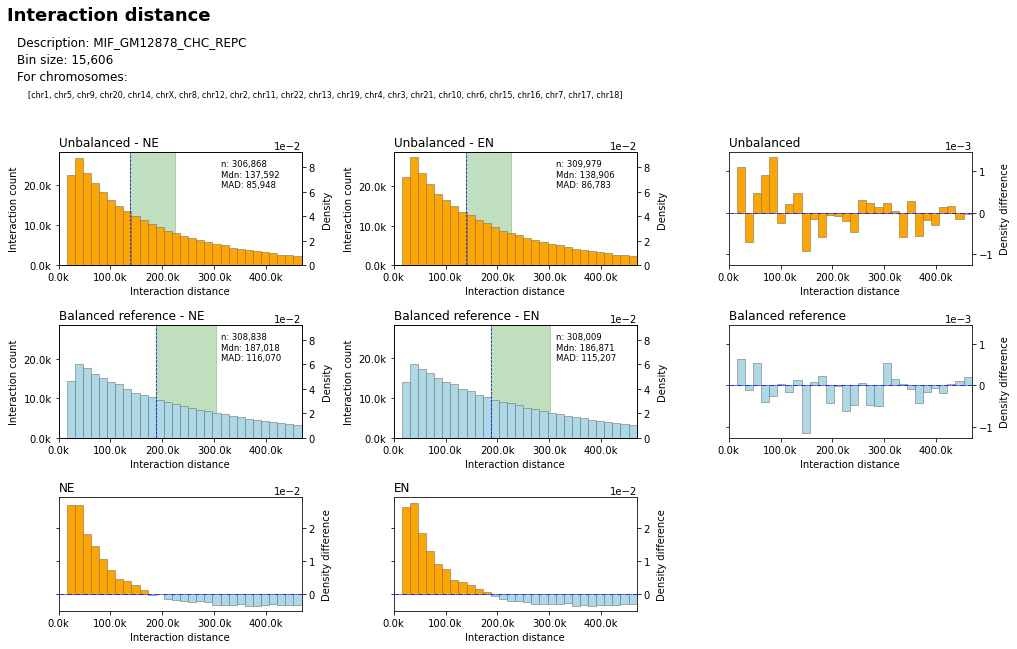

In [8]:
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis.create_2x2_hist_grid(
    num_dict = i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_dist_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

## Alternative selection of reference interactions

We have implemented an alternative procedure for the selection of reference interactions, in which we no longer select reference interactions with identical total read pair counts, but rather those with identical maximum of the four counts.

In [9]:
# Reselect reference interactions
d11_interaction_set.deselect_reference_interactions()
d11_interaction_set.select_reference_interactions(selection_rule='RPMAX')

# Pass the DiachromaticInteractionSet to IaFreqDistAnalysis
ia_freq_dist_analysis_rpmaxn = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis_rpmaxn.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = False)

print(ia_freq_dist_analysis_rpmaxn.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 1,892,588
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DIX: 
			[INFO] NN: 1,814
			[INFO] EE: 9,808
			[INFO] NE: 63,216
			[INFO] EN: 64,366
		[INFO] DI: 
			[INFO] NN: 1,092
			[INFO] EE: 28,925
			[INFO] NE: 247,538
			[INFO] EN: 249,563
		[INFO] UIR: 
			[INFO] NN: 1,092
			[INFO] EE: 28,925
			[INFO] NE: 249,254
			[INFO] EN: 247,847
		[INFO] UI: 
			[INFO] NN: 616
			[INFO] EE: 53,227
			[INFO] NE: 321,620
			[INFO] EN: 323,685
		[INFO] ALL: 
			[INFO] NN: 4,614
			[INFO] EE: 120,885
			[INFO] NE: 881,628
			[INFO] EN: 885,461
[INFO] End of report.



### Collect total read pair counts and interaction distances

In [10]:
rpmaxn_rp_num_dict, rpmaxn_i_dist_dict = ia_freq_dist_analysis_rpmaxn.get_all_rp_nums_and_i_dists()

### Total read pair counts per interaction

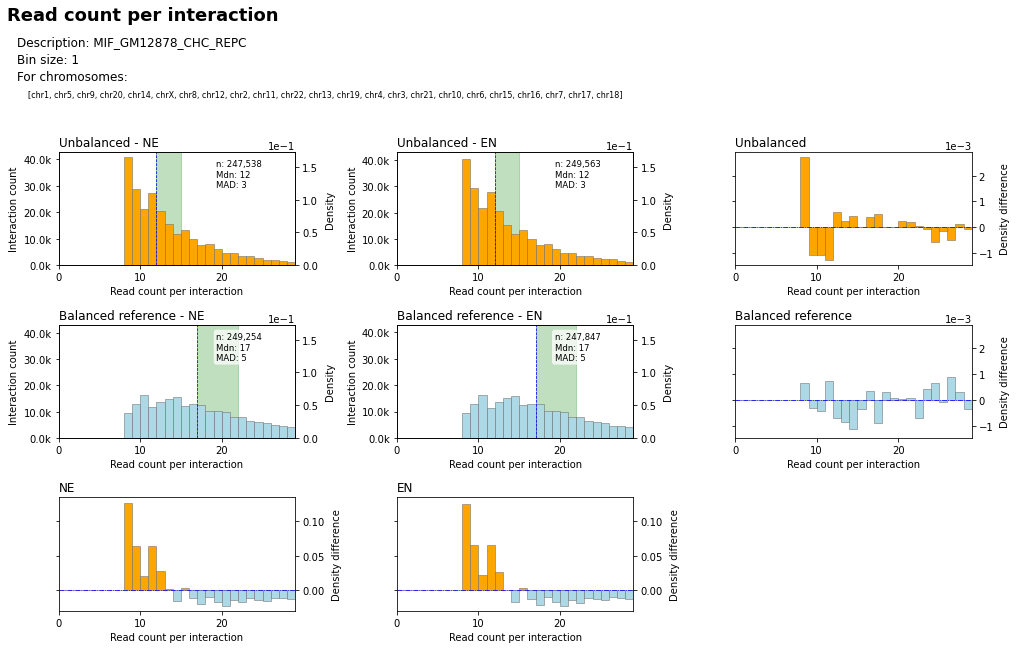

In [11]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_rpmaxn.create_2x2_hist_grid(
    num_dict = rpmaxn_rp_num_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_rpc_rpmaxn_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

### Interaction distances

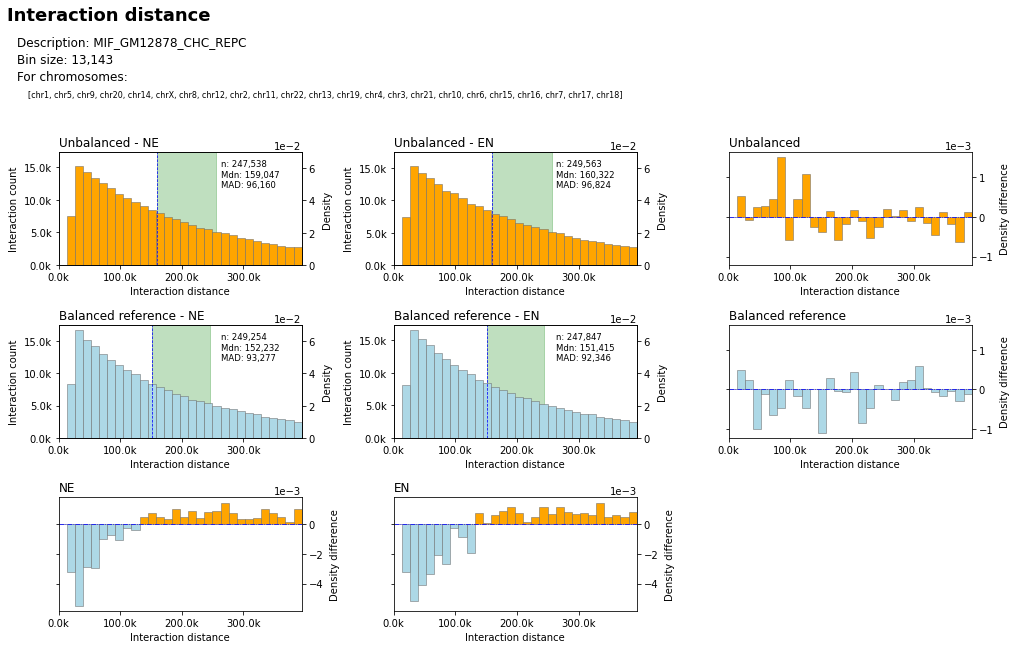

In [12]:
# Create 2x2 histogram grid for DI and UIR
i_cats = ['DI', 'UIR']
e_cats = ['NE', 'EN']
q_lim = 0.85
fig = ia_freq_dist_analysis_rpmaxn.create_2x2_hist_grid(
    num_dict = rpmaxn_i_dist_dict,
    i_cats = i_cats,
    e_cats = e_cats,
    q_lim = q_lim,
    perform_tests = False,
    description = OUT_PREFIX,
    pdf_file_name = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_2x2_hist_grid_i_dist_rpmaxn_' + '_'.join(i_cats) + '_' + '_'.join(e_cats) + '_' + str(q_lim) + '.pdf'
)

## Performing the analysis for multiple datasets

We implemented a function in `IaFreqDistAnalysis` that can be used to export all values shown in the top right of the histograms to two tab delimited files, one for total read pair counts and one for interaction distances. The first column contains descriptions of the rows (`DESCRIPTION`). The second column contains short descriptions of the rows (`DESCRIPTION_SHORT`).  This is followed by 60 columns, which result from the five interaction categories (`DIX`, `DI`, `UIR`, `UI`, `ALL`), four enrichment categories (`NN`, `NE`, `EN`, `EE`) and three reported values (`N`, `MED`, `MAD`). The last column indicates which chromosomes were taken into account (`CHROMS`).

```
DESCRIPTION   ...                           # MA_M1_RP_NUM_CHR21 or MA_M1_RP_NUM_CHR_ALL

DESCRIPTION_SHORT   ...                     # MA_M1

DIX_NN_N   DIX_NN_MED   DIX_NN_MAD   ...
DIX_NE_N   DIX_NE_MED   DIX_NE_MAD   ...
DIX_EN_N   DIX_EN_MED   DIX_EN_MAD   ...
DIX_EE_N   DIX_EE_MED   DIX_EE_MAD   ...
...
DI_NN_N   DI_EN_MED   DI_NN_MAD   ...
...
UIR_NN_N   UIR_EN_MED   UIR_NN_MAD   ...
...
UI_NN_N   UI_EN_MED   UI_NN_MAD   ...
...
ALL_NN_N   ALL_NN_MED   ALL_NN_MAD   ...
ALL_NE_N   ALL_NE_MED   ALL_NE_MAD   ...
ALL_EN_N   ALL_EN_MED   ALL_EN_MAD   ...
ALL_EE_N   ALL_EE_MED   ALL_EE_MAD

CHROMS                                       # ['chr21'] or ['chr21','chr22']

```
There is one row for each individual chromosome and the last row is for all chromosomes.

In the following cell we perform the analysis with the distance-dependent contact frequencies for all 17 cell types. However, we do not create any plots, but only export the reported values for each cell type.

In [14]:
#AUTHOR = 'JAV' # JAV, SCH
#PROTOCOL = 'CHC' # HC or CHC
#CELL_TYPE_LIST = ['MK', 'ERY', 'NEU', 'MON', 'MAC_M0', 'MAC_M1', 'MAC_M2', 'EP', 'NB', 'TB', 'FOET', 'NCD4', 'TCD4', 'NACD4', 'ACD4', 'NCD8', 'TCD8']

AUTHOR = 'SCH' # JAV, SCH
PROTOCOL = 'CHC' # HC or CHC
CELL_TYPE_LIST = ['MESC', 'MFLC', 'MESC_R1ABKO']


for CELL_TYPE_SHORT in CELL_TYPE_LIST:
    
    # Select cell type
    print(CELL_TYPE_SHORT)
    OUT_PREFIX = AUTHOR + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
    INTERACTION_FILE = '../../UICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz'
    
    # Create DiachromaticInteractionSet and IaFreqDistAnalysis object
    print('\t' + 'Preparing data...')
    d11_interaction_set = DiachromaticInteractionSet()
    d11_interaction_set.parse_file(
        i_file = INTERACTION_FILE,
        verbose = False)
    ia_freq_dist_analysis = IaFreqDistAnalysis()
    report_dict = ia_freq_dist_analysis.ingest_interaction_set(
        d11_inter_set = d11_interaction_set,
        verbose = False)
    
    # Collect read pair counts and distances
    print('\t' + 'Collecting read pair counts and distances...')
    rp_num_dict, i_dist_dict = ia_freq_dist_analysis.get_all_rp_nums_and_i_dists(verbose = False)
    
    # Write 'RP_TOTAL' table row
    print('\t' + 'Writing \'RP_TOTAL\' table row...')
    ia_freq_dist_analysis.write_num_table(
        out_prefix = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_RP_TOTAL',
        description = CELL_TYPE_SHORT,
        verbose = False)
    
    # Re-select reference sets
    print('\t' + 'Re-selecting reference sets...')
    d11_interaction_set.deselect_reference_interactions()
    d11_interaction_set.select_reference_interactions(selection_rule='RPMAX')
    ia_freq_dist_analysis_rpmaxn = IaFreqDistAnalysis()
    report_dict = ia_freq_dist_analysis_rpmaxn.ingest_interaction_set(
        d11_inter_set = d11_interaction_set,
        verbose = False)
    
    # Collect read pair counts and distances
    print('\t' + 'Collecting read pair counts and distances...')
    rpmaxn_rp_num_dict, rpmaxn_i_dist_dict = ia_freq_dist_analysis_rpmaxn.get_all_rp_nums_and_i_dists(verbose = False)
        
    # Write 'RP_MAX' table row
    print('\t' + 'Writing \'RP_MAX\' table row...')
    ia_freq_dist_analysis_rpmaxn.write_num_table(
        out_prefix = NOTEBOOK_RESULTS_DIR + '/' + OUT_PREFIX + '_RP_MAX',
        description = CELL_TYPE_SHORT,
        verbose = False)

MESC
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
MFLC
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
MESC_R1ABKO
	Preparing data...
	Writing 'RP_TOTAL' table row...
	Re-selecting reference sets...
	Writing 'RP_MAX' table row...
